In [9]:
import sys
import os
import h5py
import numpy as np
import spicy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


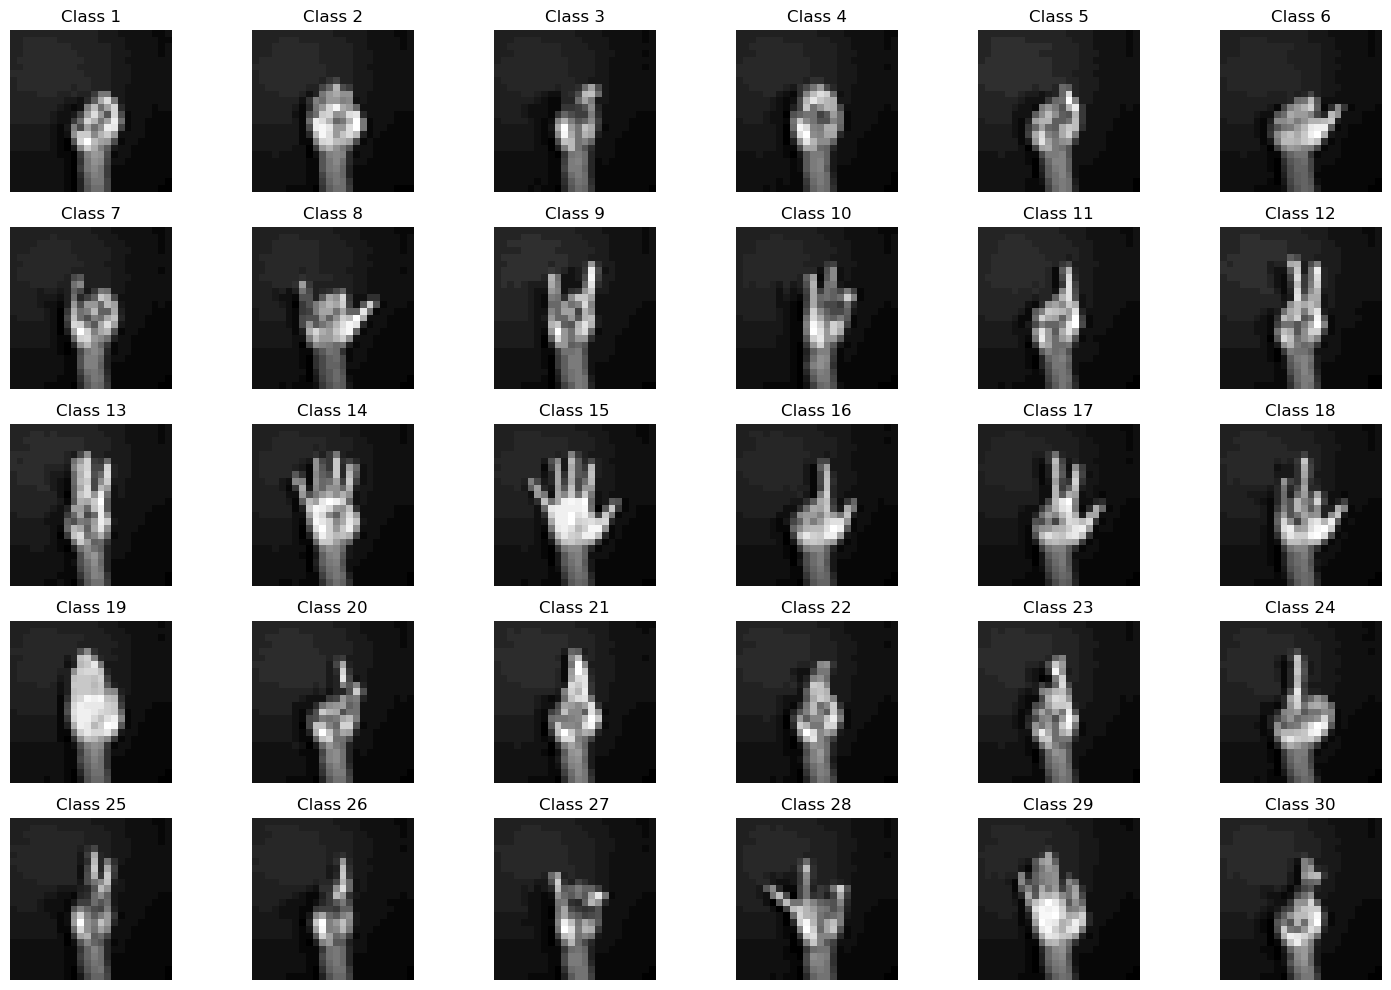

In [10]:

# Add the parent directory of the current directory to the search path for modules
parent_dir = os.pardir
sys.path.insert(0, parent_dir)

file_path = "../data/TsukubaHandSize24x24.mat"
data = spicy.io.loadmat(file_path)
data = data["data"]
"""
24, 24 - image width and height
60 - Number of images taken by a single camera
7 - number of cameras
30 - number of classes ranging from 1 to 30
100 - number of participants take took pictures of their hands 
"""

# Ensure the data shape matches the expected shape
assert data.shape == (24, 24, 60, 7, 30, 100)

# Flatten image dimensions
data = data.reshape(24*24, 60, 7, 30, 100)

# Splitting data 80-20 based on participants
train_data =data[:, :, :, :, :80]
test_data = data[:, :, :, :, 80:]

# Plot one image from each class
fig, axes = plt.subplots(5, 6, figsize=(15, 10))  # We'll display the images in a 5x6 grid
axes = axes.ravel()

for i in range(30):  # For each class
    sample_image = test_data[:, 0, 0, i, 0].reshape(24, 24)
    axes[i].imshow(sample_image, cmap='gray')
    axes[i].axis('off')  # Turn off the axis numbers
    axes[i].set_title(f"Class {i+1}")

plt.tight_layout()
plt.show()

### Trainig

In [11]:
# # Set the amount of random noise to add to the data
# noise_scale = 5e-1

# # Initialize a random number generator with a fixed seed
# rng = np.random.RandomState(seed=100)

# # Add random noise to the training data
# train_X = [_X + noise_scale * rng.randn(*_X[0].shape) for _X in train_X]

# # Add random noise to the test data
# test_X = [_X + noise_scale * rng.randn(*_X[0].shape) for _X in test_X]

In [12]:
# from src.models import KernelMSM
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint as sp_randint

# model = KernelMSM(n_subdims=5, sigma=100, faster_mode=True)
# model.fit(train_X, train_y)

### Evaluation

In [13]:
# pred = model.predict(test_X)
# print(f"pred: {pred}\ntrue: {test_y}\naccuracy: {(pred == test_y).mean()}")